## Import

In [116]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import r2_score,mean_squared_error,confusion_matrix,accuracy_score, plot_confusion_matrix

import nltk
from nltk.stem import WordNetLemmatizer

from textblob import TextBlob, Word

%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('clean.csv')

In [3]:
df.head()

,author,created_utc,id,parent_id,permalink,score,subreddit,time,cleaned
0,equipped_metalblade,1602111063,g81viyl,t1_g81m7k9,/r/PandR/comments/j6t2gg/while_watching_the_go...,4,1,2020-10-07,have penis now ’ resplendent
1,phattsrules,1602111491,g81wdhv,t3_j6t2gg,/r/PandR/comments/j6t2gg/while_watching_the_go...,1,1,2020-10-07,call posting this weekly post next week
2,goosepoopriot,1602111628,g81wn4k,t3_j6t2gg,/r/PandR/comments/j6t2gg/while_watching_the_go...,1,1,2020-10-07,good catch
3,Zenkraft,1602112060,g81xh8n,t1_g81ubku,/r/PandR/comments/j6t2gg/while_watching_the_go...,1,1,2020-10-07,took tramadol once for legitimate back pain an...
4,DBZOverlord123,1602112118,g81xlgj,t1_g81ifc7,/r/PandR/comments/j6t2gg/while_watching_the_go...,7,1,2020-10-07,jean ralphio line make die inside and laugh lo...


In [4]:
df.shape

(18923, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18923 entries, 0 to 18922
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   author       18923 non-null  object
 1   created_utc  18923 non-null  int64 
 2   id           18923 non-null  object
 3   parent_id    18923 non-null  object
 4   permalink    18923 non-null  object
 5   score        18923 non-null  int64 
 6   subreddit    18923 non-null  int64 
 7   time         18923 non-null  object
 8   cleaned      18813 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.3+ MB


In [6]:
df['cleaned'].isnull().sum()

110

In [7]:
df = df.dropna(how = 'any')

In [8]:
df

,author,created_utc,id,parent_id,permalink,score,subreddit,time,cleaned
0,equipped_metalblade,1602111063,g81viyl,t1_g81m7k9,/r/PandR/comments/j6t2gg/while_watching_the_go...,4,1,2020-10-07,have penis now ’ resplendent
1,phattsrules,1602111491,g81wdhv,t3_j6t2gg,/r/PandR/comments/j6t2gg/while_watching_the_go...,1,1,2020-10-07,call posting this weekly post next week
2,goosepoopriot,1602111628,g81wn4k,t3_j6t2gg,/r/PandR/comments/j6t2gg/while_watching_the_go...,1,1,2020-10-07,good catch
3,Zenkraft,1602112060,g81xh8n,t1_g81ubku,/r/PandR/comments/j6t2gg/while_watching_the_go...,1,1,2020-10-07,took tramadol once for legitimate back pain an...
4,DBZOverlord123,1602112118,g81xlgj,t1_g81ifc7,/r/PandR/comments/j6t2gg/while_watching_the_go...,7,1,2020-10-07,jean ralphio line make die inside and laugh lo...
...,...,...,...,...,...,...,...,...,...
18918,TheFukkingSwqmpKING,1593559205,fwj1rb2,t1_fwj0p40,/r/DunderMifflin/comments/hiygi8/dont_know_don...,1,0,2020-06-30,’ joke from the show calm down
18919,HermioneGranger429,1593559334,fwj1zvs,t1_fwj0p40,/r/DunderMifflin/comments/hiygi8/dont_know_don...,2,0,2020-06-30,one can dislike someone more than michael disl...
18920,wywyfiz,1593559335,fwj1zy7,t3_hiqcz9,/r/DunderMifflin/comments/hiqcz9/this_picture_...,1,0,2020-06-30,god
18921,okhi2u,1593559360,fwj21hy,t1_fwisno7,/r/DunderMifflin/comments/hitb1d/a_beard_makes...,1,0,2020-06-30,one too many you spelled wrong


In [9]:
df['cleaned'].isnull().sum()

0

## Train-Test Split

In [10]:
X = df['cleaned']
y = df['subreddit']

In [11]:
y.value_counts(normalize = True)

1    0.506458
0    0.493542
Name: subreddit, dtype: float64

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)

### Most Used Words

In [138]:
cvec = CountVectorizer(stop_words = 'english', ngram_range=(3, 4))

In [141]:
cvec.fit(X_train)

CountVectorizer(ngram_range=(3, 4), stop_words='english')

In [153]:
X_train = cvec.transform(X_train)

In [154]:
X_train

<14109x151079 sparse matrix of type '<class 'numpy.int64'>'
	with 160681 stored elements in Compressed Sparse Row format>

In [155]:
X_train_df = pd.DataFrame(X_train.toarray(),
                          columns=cvec.get_feature_names())

In [156]:
top_words = {}

# loop through columns
for i in X_train_df.columns:
    # save sum of each column in dictionary
    top_words[i] =  X_train_df[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_freq = pd.DataFrame(sorted(top_words.items(), key = lambda x: x[1], reverse = True))

In [157]:
most_freq_df = pd.DataFrame(most_freq)

In [158]:
most_freq_df.head()

,0,1
0,wow wow wow,1214
1,wow wow wow wow,1213
2,http www reddit,110
3,http www reddit com,107
4,www reddit com,107


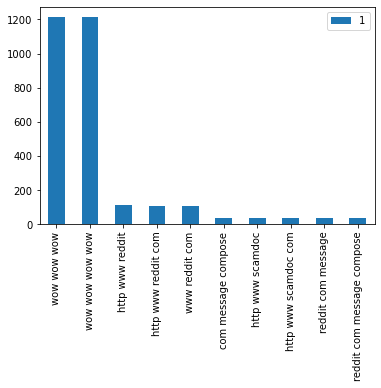

In [159]:
most_freq_df.nlargest(10, 1).plot(kind = 'bar')
plt.xticks([i for i in range(10)], [col for col in most_freq_df.nlargest(10, 1)[0]]);

## Logistic Regression

In [82]:
cvect = CountVectorizer()
clf = LogisticRegression()

pipe = make_pipeline(cvect, forest)

In [83]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('randomforestclassifier', RandomForestClassifier())])

In [84]:
pipe.score(X_train, y_train)

0.9933375859380538

In [85]:
pipe.score(X_test, y_test)

0.6877125850340136

In [88]:
params = {
    'countvectorizer__max_features': [1000, 2000, 5000], 
    'countvectorizer__min_df': [2, 3],
    'countvectorizer__max_df': [.9, .95],
    'countvectorizer__ngram_range': [(1, 1), (1, 2)]
}
gs = GridSearchCV(pipe, param_grid = params, cv=3)

In [89]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'countvectorizer__max_df': [0.9, 0.95],
                         'countvectorizer__max_features': [1000, 2000, 5000],
                         'countvectorizer__min_df': [2, 3],
                         'countvectorizer__ngram_range': [(1, 1), (1, 2)]})

In [90]:
gs.score(X_train, y_train)

0.9793039903607627

In [91]:
gs.score(X_test, y_test)

0.6940901360544217

In [92]:
gs.best_score_

0.6731873272379333

In [93]:
gs.best_params_

{'countvectorizer__max_df': 0.95,
 'countvectorizer__max_features': 5000,
 'countvectorizer__min_df': 3,
 'countvectorizer__ngram_range': (1, 1)}

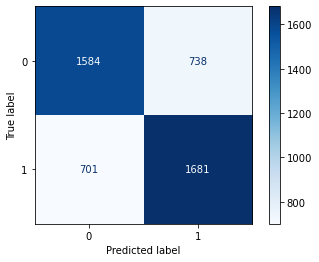

In [171]:
preds2 = gs.predict(X_test)
plot_confusion_matrix(gs, X_test, y_test, cmap='Blues', values_format='d')

In [172]:
tn, fp, fn, tp = confusion_matrix(y_test, preds2).ravel()

In [173]:
(tp + tn) / (tp + tn + fp + fn)

0.6940901360544217

## Random Forest

In [65]:
cvect = CountVectorizer()
forest = RandomForestClassifier()

In [66]:
pipe2 = make_pipeline(cvect, forest)

In [67]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('randomforestclassifier', RandomForestClassifier())])

In [68]:
pipe2.score(X_train, y_train)

0.9933375859380538

In [69]:
pipe2.score(X_test, y_test)

0.6843112244897959

In [76]:
params2 = {
    'countvectorizer__max_features': [1000, 2000, 5000], 
    'countvectorizer__min_df': [2, 3],
    'countvectorizer__max_df': [.9, .95],
    'countvectorizer__ngram_range': [(1, 1), (1, 2)]
}
gs2 = GridSearchCV(pipe2, param_grid = params2, cv = 5, scoring = 'precision')

In [77]:
gs2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'countvectorizer__max_df': [0.9, 0.95],
                         'countvectorizer__max_features': [1000, 2000, 5000],
                         'countvectorizer__min_df': [2, 3],
                         'countvectorizer__ngram_range': [(1, 1), (1, 2)]},
             scoring='precision')

In [78]:
gs2.score(X_train, y_train)

0.9883157594756341

In [79]:
gs2.score(X_test, y_test)

0.6847781003732891

In [80]:
gs2.best_score_

0.6821585792732818

In [81]:
gs2.best_params_

{'countvectorizer__max_df': 0.95,
 'countvectorizer__max_features': 5000,
 'countvectorizer__min_df': 3,
 'countvectorizer__ngram_range': (1, 1)}

In [122]:
preds_ = gs2.predict(X_test)

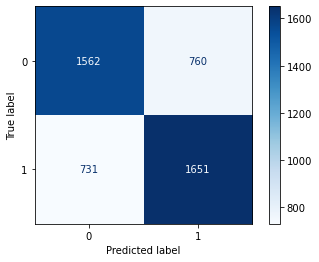

In [161]:
plot_confusion_matrix(gs2, X_test, y_test, cmap='Blues', values_format='d')

In [163]:
tn, fp, fn, tp = confusion_matrix(y_test, preds_).ravel()

In [164]:
sensitivity = tp / (tp +fn)
sensitivity

0.6931150293870697

In [165]:
(tp + tn) / (tp + tn + fp + fn)

0.6830357142857143

## Naive-Bayes

In [97]:
cvect = CountVectorizer(stop_words='english')
nbayes = MultinomialNB()
pipe3 = make_pipeline(cvect, nbayes)

In [98]:
params3 = {'countvectorizer__max_features': [100, 2500, 5000],
         'countvectorizer__min_df': [2, 3],
         'countvectorizer__max_df': [.9, .95],
         'countvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]}

In [99]:
grid = GridSearchCV(pipe3, param_grid = params3)

In [100]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(stop_words='english')),
                                       ('multinomialnb', MultinomialNB())]),
             param_grid={'countvectorizer__max_df': [0.9, 0.95],
                         'countvectorizer__max_features': [100, 2500, 5000],
                         'countvectorizer__min_df': [2, 3],
                         'countvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (1, 3)]})

In [101]:
grid.score(X_train, y_train)

0.778651924303636

In [102]:
grid.score(X_test, y_test)

0.70046768707483

In [103]:
grid.best_score_

0.6928916491706552

In [104]:
grid.best_params_

{'countvectorizer__max_df': 0.9,
 'countvectorizer__max_features': 5000,
 'countvectorizer__min_df': 2,
 'countvectorizer__ngram_range': (1, 1)}

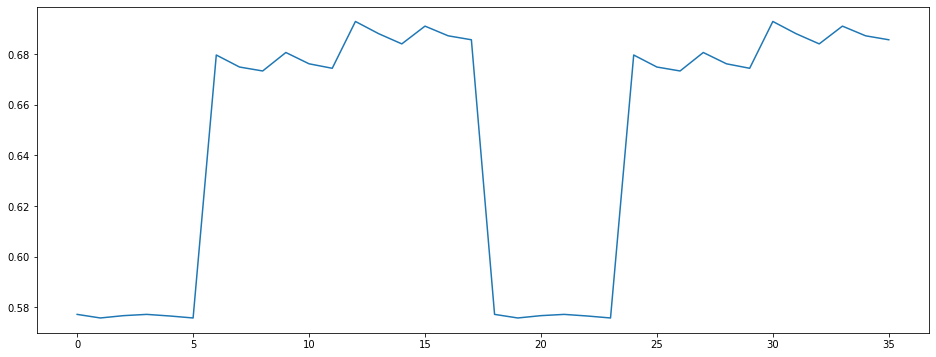

In [105]:
pd.DataFrame(grid.cv_results_)['mean_test_score'].plot(figsize = (16, 6))

In [107]:
df_grid = pd.DataFrame(grid.cv_results_)

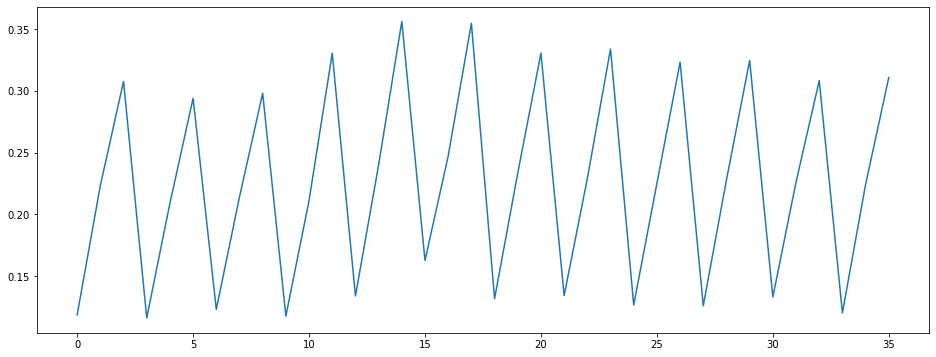

In [109]:
df_grid['mean_fit_time'].plot(figsize = (16, 6))

In [176]:
preds = grid.predict(X_test)

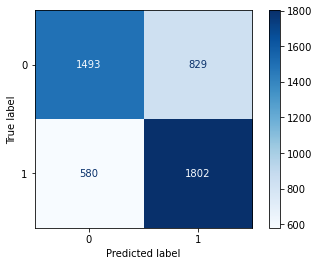

In [177]:
plot_confusion_matrix(grid, X_test, y_test, cmap='Blues', values_format='d')

In [178]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [179]:
specificity = tn/(tn + fp)
specificity

0.6429801894918173

In [180]:
(tp + tn) / (tp + tn + fp + fn)

0.70046768707483

In [183]:
preds


array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

## Baseline

In [111]:
1- y_train.sum()/len(y_train)

0.4935147778014034